# Gráficos *jointplot* y *pairplot* en `Seaborn`

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## *Jointplot*

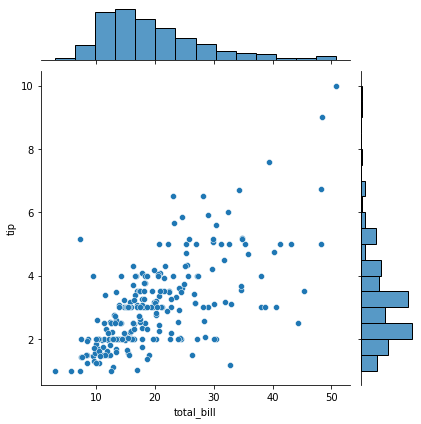

In [3]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip')
plt.show()

Nótese que el *joinplot* mezcla dos gráficos distintos: por un lado, se tiene un gráfico de dispersión para dos variables continuas en la parte central, y de forma marginal de tienes dos histogramas para cada uno de los histogramas.

A estos gráficos se le pueden agregar las opciones usuales de `Seaborn`, como la discriminación de acuerdo con una variable categórica:

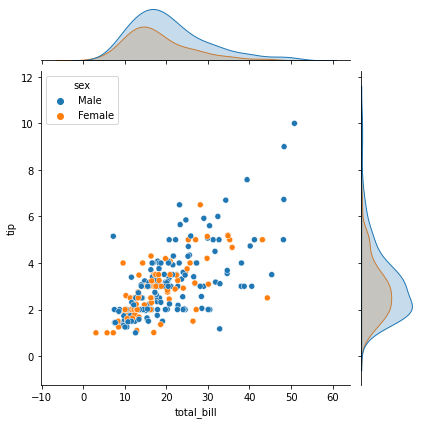

In [5]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              hue = 'sex')

Como se puede ver en el gráfico anterior, los puntos en el diagrama de dispersión dependen de la característica `Sex`, y para los histogramas se tienen las distribuciones asociadas para cada género, respetando los mismos colores que se tienen ene l histograma.

Por otor lado, se puede cambiar el tipo de gráfico que se tiene en la parte media de la figura, para lo cual se puede usar el argumento `kind`.

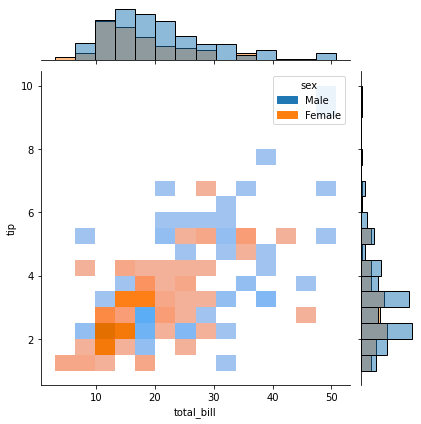

In [7]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              hue = 'sex',
              kind = 'hist')

Nótese que al tener el argumento `kde = 'hist'`, se cambiará el gráfico de dispersión por una suerte de mapa de calor. Ahora, si usamos `kind = 'kde'`:

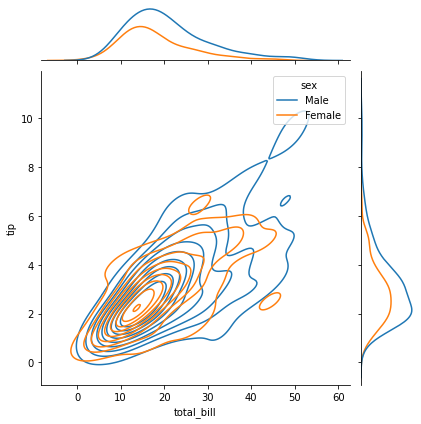

In [9]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              hue = 'sex',
              kind = 'kde')
plt.show()

Asimismo, se tiene un argumento denominado `marginal_ticks`, el cual es de tipo *booleano* y que por defecto es `False` y que permite agregarle ejes a los histogramas marginales del gráfico. Veamos:

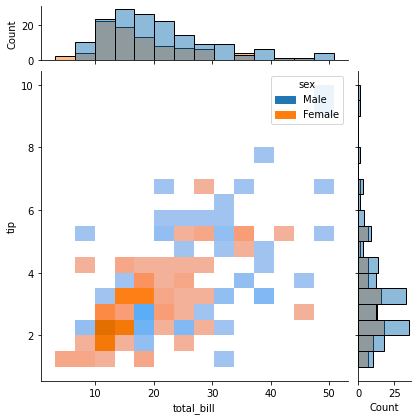

In [11]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              hue = 'sex',
              kind = 'hist',
              marginal_ticks = True)
plt.show()

Y estos histogramas pueden personalizarse aún más con ayuda del argumento `marginal_kws`, usando un diccionario:

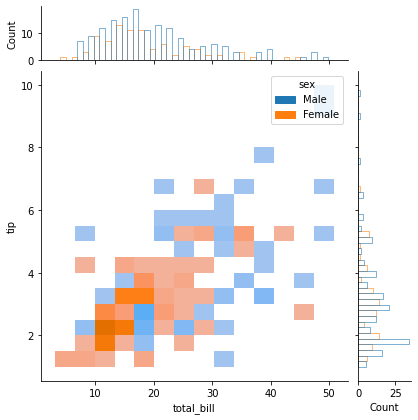

In [12]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              hue = 'sex',
              kind = 'hist',
              marginal_ticks = True,
              marginal_kws = dict(bins = 25, fill = False, multiple = 'dodge'))
plt.show()

Nótese que en el argumento `marginal_kws`, el cual parte de una tupla que ha sido transformada a diccionario, hemos indicado que:
- Ambos histogramas cuenten con 25 barras.
- Ninguna de las barras tenga relleno (solo se visualizarán los bordes).
- Las barras estén apiladas, teniendo en cuenta que previamente fueron discriminadas de acuerdo con la variable `Hue`.

## *Pairplots*

Los **pairplots** o gráficos de pares permiten conocer las relaciones que existen entre las variables cuantitativas de un marco de datos, dos a dos, con un arreglo matricial. Veamos cuáles son las variables cuantitativas de nuestro marco de datos:

In [15]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Nótese que las variables cuantitativas son tres, a saber: `total_bill`, `tip` y `size`. Entonces, al usar `sns.pairplot()` donde se obtendrán varios gráficos en un arreglo matricial donde se evidencie la relación entre estas variables cuantitativas.

Es importante anotar que para invocar esta función no es necesario invocar a algunas varibles `x` y `y` particular, sino que basta con indicar cuál es el marco de datos que se va a emplear, lo cual se consigue con ayuda del argumento `data`. Veamos:

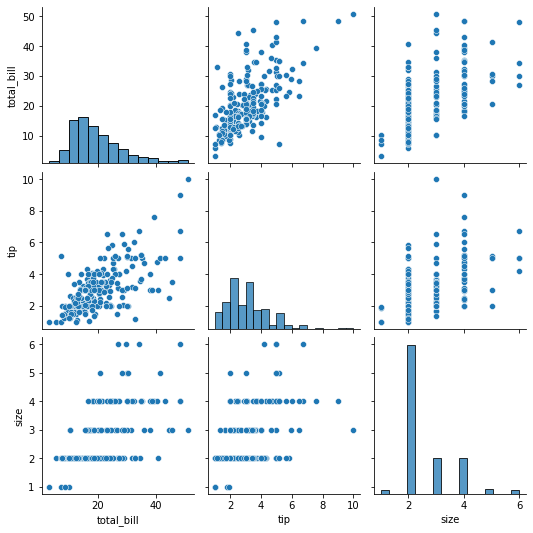

In [14]:
sns.pairplot(data = tips)
plt.show()

Nótese que en la diagonal principal de esta matriz se tienen gráficos útiles para análisis univariados, siendo histogramas para variables que son **continuas**, como `total_bill` y `tip`, mientras que para variables cuantitativas discretas apela a `size`.

En contraste, en las matrices triangulaes e inferiores se representan diagramas de dispersión entre las variables asociadas a la fila y a la columna donde se haya el gráfico en la matriz. Nótese que los gráficos en ambas matrices son, en esencia, los mismos, solo que los ejes están invertidos, representándose siempre en el eje horizontal a la variable que se tiene en las columnas, toda vez que en el eje vertical se representa a la característica asociada a las filas.

Ahora bien, a estos gráficos de pares también los podemos discriminar de acuerdo con alguna variable categórica. Hagámoslo de acuerdo con el omento del día:

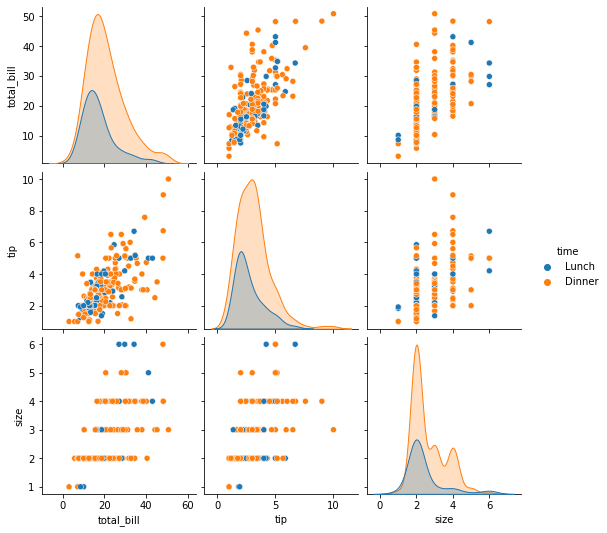

In [16]:
sns.pairplot(data = tips,
             hue = 'time')
plt.show()

Y como se observa, se discrimnan las observaciones usando colores para identificar el momento del día asociada a cada una. Nótese, además, que los gráficos univariados de la diagonal principal fueron cambiados por gráficos de densidad, que aún siguen siendo bastante útiles para estudiar la distribución de estas variables, aunque puede resultar problemática para variables cuantitativas discretas, como se puede ver en el gráfico de dispersión relacionado a la variable `size`, que parece ser multimodal.

Otros elementos de customización son la paleta de colores:

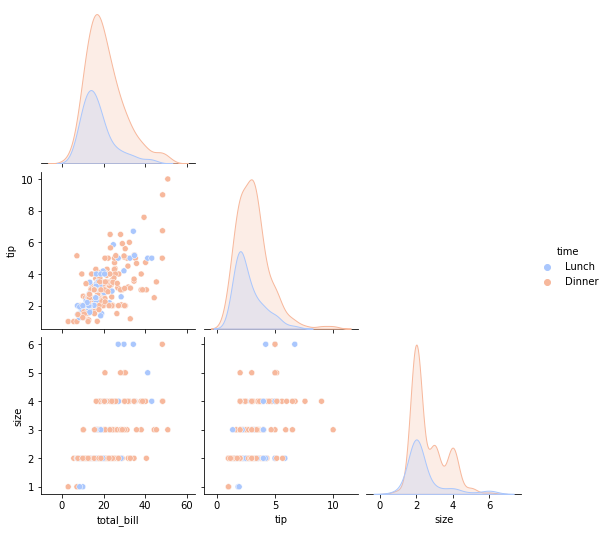

In [17]:
sns.pairplot(data = tips,
             hue = 'time',
             palette = 'coolwarm',
             corner = True)
plt.show()

Con el parámetro `palette` hemos modificado las tonalidades de los colores que se usan en el gráfico de dispersión, y al darle `True` al parámetro `corner`, se elimina la matriz triangular superior, lo cual es conveniente para evitar que se sature el gráfico con subfiguras repetidas.

## *Heatmap*

Es otro gráfico útil que apela a estructuras matriciales para su representación, y es útil para estudiar la correlación entre variables cuantitativas.

In [18]:
correlacion = tips.corr()
correlacion

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


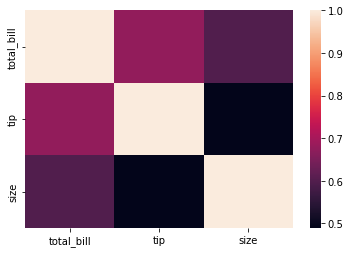

In [20]:
sns.heatmap(correlacion)
plt.show()

Podemos ver que, con ayuda de colores, podemos conocer la correlación entre diferentes valores. Ahora, para poder mejorar la legibilidad de estos gráficos, podemos usar el argumento `annot` para que se incluyan los valores de correlación *per se*:

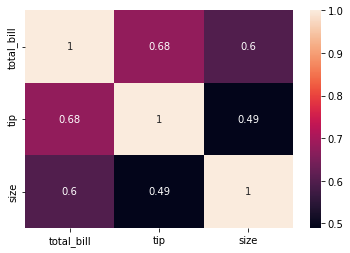

In [22]:
sns.heatmap(correlacion,
            annot = True)
plt.show()

Otro argumento típico es la modificación de la escala de colores con ayuda del argumento `cmap`:

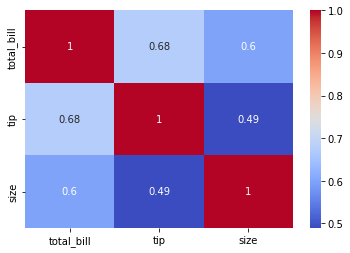

In [23]:
sns.heatmap(correlacion,
            annot = True,
            cmap = 'coolwarm')
plt.show()

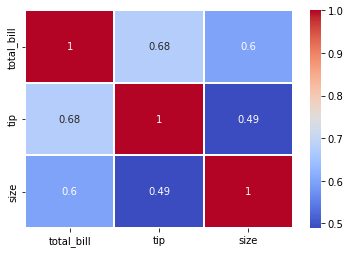

In [27]:
sns.heatmap(correlacion,
            annot = True,
            cmap = 'coolwarm',
            linewidths = 2)
plt.show()

Como se observa, en los primeros gráficos todos los cuadrados estaban yuxtapuestos, mientras que al usar `linewidths = 2`, se da un espaciamiento entre gráfico y gráfico.

Por último, para eliminar la barra de escala que aparece en el margen de derecho, se puede usar el argumento: `cbar = False`. Veamos:

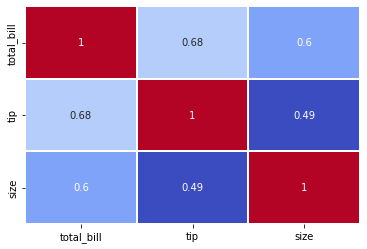

In [28]:
sns.heatmap(correlacion,
            annot = True,
            cmap = 'coolwarm',
            linewidths = 2,
            cbar = False)
plt.show()